In [236]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
from scipy import stats

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.float_format', lambda x: '%.5f' % x if int(x) != x else '%d' % int(x))

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,6)})

# Datetime lib
from pandas import to_datetime
import itertools
import warnings
import datetime
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, scale
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA



In [237]:
raw_data = pd.read_csv(r'C:\Users\khalil\LocalDrive\EVChallenge\df_temp.csv')
raw_data.head()

,meter,consumption_mean_2020-10-04,consumption_mean_2020-10-11,consumption_mean_2020-10-18,consumption_mean_2020-10-25,consumption_mean_2020-11-01,consumption_mean_2020-11-08,consumption_mean_2020-11-15,consumption_mean_2020-11-22,consumption_mean_2020-11-29,...,amps_coeff_var_2021-10-03,amps_coeff_var_2021-10-10,amps_coeff_var_2021-10-17,amps_coeff_var_2021-10-24,amps_coeff_var_2021-10-31,amps_coeff_var_2021-11-07,amps_coeff_var_2021-11-14,amps_coeff_var_2021-11-21,amps_coeff_var_2021-11-28,amps_coeff_var_2021-12-05
0,396,0.12865,0.13534,0.11287,0.12403,0.11915,0.14365,0.12749,0.15297,0.12252,...,0.95787,0.78701,0.97431,1.06200,0.74293,0.74118,0.89941,0.62693,0.79161,NaN
1,428,0.08531,0.08507,0.07870,0.07921,0.07851,0.07694,0.10682,0.12458,0.12209,...,3.31138,3.14969,3.02258,3.09293,3.15822,3.19519,3.31676,2.94652,3.30837,2.99016
2,829,0.25597,0.54722,0.32927,0.39700,0.26681,0.29882,0.26391,0.25868,0.25877,...,1.18866,1.20990,1.10261,1.29903,1.26790,1.12871,1.23945,1.27054,1.09964,1.08613
3,4970,0.04902,0.05702,0.05103,0.04177,0.04251,0.04389,0.04821,0.04951,0.04594,...,0.78332,0.50308,0.73788,0.67798,0.64925,0.81674,0.74274,0.73874,0.67464,0.29402
4,5228,0.21829,0.31229,0.11272,0.19382,0.11177,0.22105,0.18344,0.21368,0.17912,...,0.95104,1.04180,1.11423,1.01247,1.15629,1.13212,0.74456,1.61950,0.79791,0.91839


In [238]:
for column in raw_data:
    unique_vals = np.unique(raw_data[column])
    nr_values = len(unique_vals)
    if nr_values < 12:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature meter :1053
The number of values for feature consumption_mean_2020-10-04 :985
The number of values for feature consumption_mean_2020-10-11 :993
The number of values for feature consumption_mean_2020-10-18 :993
The number of values for feature consumption_mean_2020-10-25 :995
The number of values for feature consumption_mean_2020-11-01 :998
The number of values for feature consumption_mean_2020-11-08 :989
The number of values for feature consumption_mean_2020-11-15 :1001
The number of values for feature consumption_mean_2020-11-22 :1004
The number of values for feature consumption_mean_2020-11-29 :1003
The number of values for feature consumption_mean_2020-12-06 :1003
The number of values for feature consumption_mean_2020-12-13 :1003
The number of values for feature consumption_mean_2020-12-20 :1001
The number of values for feature consumption_mean_2020-12-27 :1003
The number of values for feature consumption_mean_2021-01-03 :1007
The number of values fo

In [239]:
raw_data['Temp'] = raw_data['has_ev_first_2021-10-10']
cols_to_drop = [x for x in raw_data.columns.to_list() if x.startswith('has_ev')]
raw_data = raw_data.drop(columns=cols_to_drop)
raw_data = raw_data.rename({'Temp': 'has_ev'}, axis=1)

In [240]:
raw_data['Temp'] = raw_data['phases_first_2021-10-10']
cols_to_drop = [x for x in raw_data.columns.to_list() if x.startswith('phases')]
raw_data = raw_data.drop(columns=cols_to_drop)
raw_data = raw_data.rename({'Temp': 'phases'}, axis=1)

In [279]:

# total consumption per week (coefficient of variance)
X1 = [x for x in raw_data.columns.to_list() if x.startswith(('total_consumption_coeff_var', 'd_total_consumption', 'd_amps', 'amps_coeff_var','cons_above_75','amps_above_75', 'phases'))]
X1_reduced = [ x for x in raw_data.columns.to_list() if x.startswith(('amps_above_75_sum', 'total_consumption_std', 'total_consumption_coeff_var', 'amps_mean'))]
# total consumption per week (mean and standard deviation)
X2 = [x for x in raw_data.columns.to_list() if x.startswith(('total_consumption_mean', 'total_consumption_std', 'd_total_consumption', 'd_amps','amps_mean', 'amps_std','cons_above_75','amps_above_75', 'phases'))]
# raw consumption per week (coefficiet of variance)
X3 = [x for x in raw_data.columns.to_list() if x.startswith(('consumption_coeff_var', 'amps_coeff_var', 'd_consumption', 'd_amps','cons_above_75','amps_above_75', 'phases'))]
# raw consumption per week (mean and standard deviation)
X4 = [x for x in raw_data.columns.to_list() if x.startswith(('consumption_mean', 'consumption_std', 'd_consumption', 'd_amps', 'amps_mean', 'amps_std','cons_above_75','amps_above_75', 'phases'))]



In [280]:
len(X1_reduced)

248

In [301]:
df_analysis = raw_data[X1_reduced + ['has_ev']]

In [308]:
df_analysis.shape

(1053, 249)

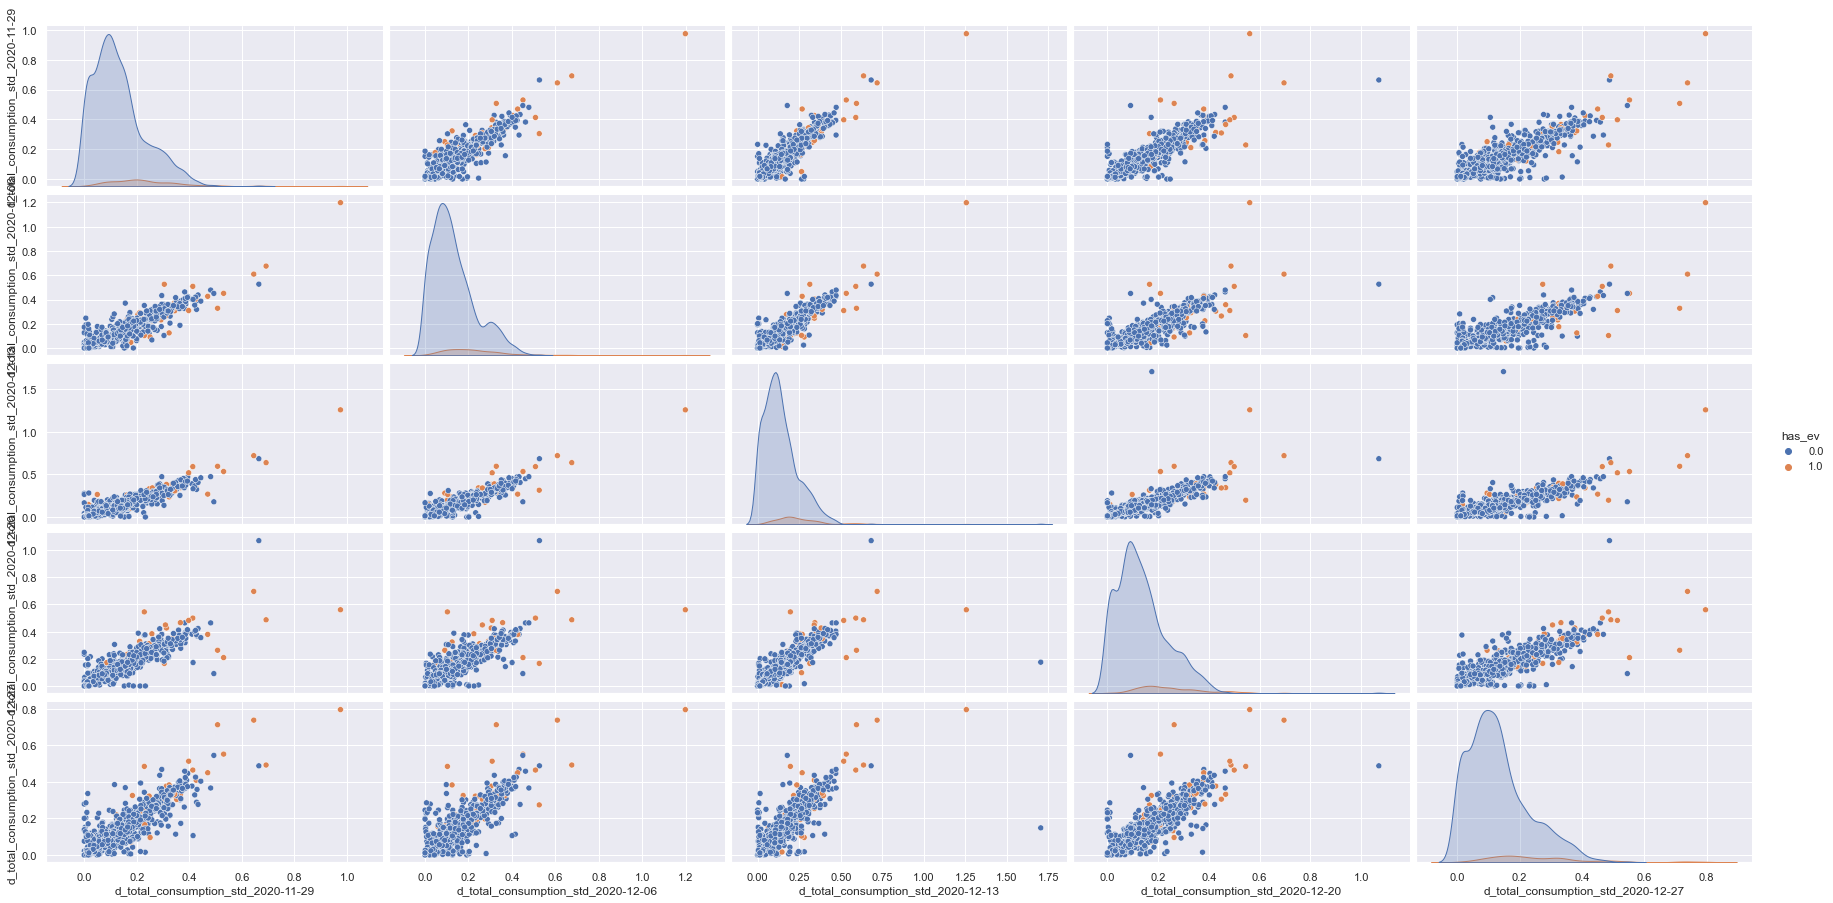

In [282]:
# Visualize the data using seaborn Pairplots
g = sns.pairplot(raw_data[(X1_reduced[70:75] + ['has_ev'])], hue = 'has_ev', diag_kws={'bw': 0.2}, aspect=2) # blue: not having EV, orange: have EV

In [266]:
# Investigate categorical feature

# features = ['phases', 'channels']


# for f in features:
#     plt.figure()
#     ax = sns.countplot(x=f, data=raw_data, hue = 'has_ev', palette="Set1")

In [299]:
# # Making categorical variables into numeric representation
# df_analysis = pd.get_dummies(raw_data, columns = ['phases'])
# df_analysis.head()

,meter,consumption_mean_2020-10-04,consumption_mean_2020-10-11,consumption_mean_2020-10-18,consumption_mean_2020-10-25,consumption_mean_2020-11-01,consumption_mean_2020-11-08,consumption_mean_2020-11-15,consumption_mean_2020-11-22,consumption_mean_2020-11-29,...,amps_coeff_var_2021-10-24,amps_coeff_var_2021-10-31,amps_coeff_var_2021-11-07,amps_coeff_var_2021-11-14,amps_coeff_var_2021-11-21,amps_coeff_var_2021-11-28,amps_coeff_var_2021-12-05,has_ev,phases_1.0,phases_3.0
0,396,0.12865,0.13534,0.11287,0.12403,0.11915,0.14365,0.12749,0.15297,0.12252,...,1.06200,0.74293,0.74118,0.89941,0.62693,0.79161,NaN,0,1,0
1,428,0.08531,0.08507,0.07870,0.07921,0.07851,0.07694,0.10682,0.12458,0.12209,...,3.09293,3.15822,3.19519,3.31676,2.94652,3.30837,2.99016,0,1,0
2,829,0.25597,0.54722,0.32927,0.39700,0.26681,0.29882,0.26391,0.25868,0.25877,...,1.29903,1.26790,1.12871,1.23945,1.27054,1.09964,1.08613,0,1,0
3,4970,0.04902,0.05702,0.05103,0.04177,0.04251,0.04389,0.04821,0.04951,0.04594,...,0.67798,0.64925,0.81674,0.74274,0.73874,0.67464,0.29402,0,1,0
4,5228,0.21829,0.31229,0.11272,0.19382,0.11177,0.22105,0.18344,0.21368,0.17912,...,1.01247,1.15629,1.13212,0.74456,1.61950,0.79791,0.91839,0,1,0


In [309]:
df_analysis.shape

(1053, 249)

In [310]:
# drop missings
df_analysis = df_analysis.fillna(0)

In [311]:
# # Scaling our columns
# scale_vars = ['*mean*']
# scaler = MinMaxScaler()
# df_analysis[scale_vars] = scaler.fit_transform(df_analysis[scale_vars])
# df_analysis.head()

In [325]:
X = df_analysis.drop('has_ev', axis=1).values # Input features (attributes)
y = df_analysis['has_ev'].values # Target vector
print('X shape: {}'.format(np.shape(X)))
print('y shape: {}'.format(np.shape(y)))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, test_size=0.25, random_state=0) # can try differen split proportion

X shape: (1053, 248)
y shape: (1053,)


In [326]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1) #max_depth=2: 2 layers
dtree.fit(X_train, y_train)

# Doc:https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)

In [327]:
df_analysis.head()

,total_consumption_std_2020-10-04,total_consumption_std_2020-10-11,total_consumption_std_2020-10-18,total_consumption_std_2020-10-25,total_consumption_std_2020-11-01,total_consumption_std_2020-11-08,total_consumption_std_2020-11-15,total_consumption_std_2020-11-22,total_consumption_std_2020-11-29,total_consumption_std_2020-12-06,...,total_consumption_coeff_var_2021-10-10,total_consumption_coeff_var_2021-10-17,total_consumption_coeff_var_2021-10-24,total_consumption_coeff_var_2021-10-31,total_consumption_coeff_var_2021-11-07,total_consumption_coeff_var_2021-11-14,total_consumption_coeff_var_2021-11-21,total_consumption_coeff_var_2021-11-28,total_consumption_coeff_var_2021-12-05,has_ev
0,0.14806,0.11526,0.09921,0.10740,0.10439,0.12388,0.12355,0.15149,0.14015,0.11226,...,0.82670,1.10590,1.14329,0.83500,0.76870,1.06108,0.68455,0.87630,0,0
1,0.21380,0.25869,0.24309,0.23755,0.24819,0.24596,0.26620,0.27988,0.27260,0.31193,...,2.68561,2.58731,2.63931,2.77641,2.78578,2.87047,2.51028,2.66247,2.36736,0
2,0.29591,0.61932,0.40431,0.44105,0.33163,0.36192,0.30372,0.31861,0.30873,0.25461,...,1.28067,1.11944,1.36997,1.35917,1.26429,1.30760,1.35614,1.17158,1.12973,0
3,0.06198,0.07382,0.06450,0.06694,0.06232,0.07143,0.07080,0.06386,0.05893,0.05778,...,3.65029,3.12502,4.24210,4.22704,4.07270,3.87235,4.28993,4.48373,2.71586,0
4,0.20736,0.27297,0.15156,0.22371,0.14417,0.31648,0.26337,0.29025,0.25149,0.23446,...,1.30957,1.31980,1.25894,1.68306,1.71494,0,4.01295,0,0.90236,0


In [328]:
# Calculating Feature Importance (FI)
for i, column in enumerate(df_analysis.drop('has_ev', axis=1)):
    # print('Importance of feature {}:, {:.3f}'.format(column, dtree.feature_importances_[i]))
    
    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dtree.feature_importances_[i]]})
    
    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi

final_fi.head() 
        
# Ordering the data
final_fi = final_fi.drop('level_0', axis=1).sort_values('Feature Importance Score', ascending = False).reset_index()            
final_fi.head(100)

,level_0,index,Variable,Feature Importance Score
0,0,NaN,amps_above_75_sum_2021-05-16,0.52337
1,1,NaN,amps_above_75_sum_2021-05-16,0.42404
2,2,777,amps_above_75_sum_2021-05-16,0.42404
3,3,NaN,amps_above_75_sum_2021-05-16,0.42404
4,4,NaN,amps_above_75_sum_2021-05-16,0.42404
5,5,NaN,amps_above_75_sum_2021-05-16,0.42404
6,6,NaN,amps_above_75_sum_2021-05-16,0.42404
7,7,NaN,amps_above_75_sum_2021-05-16,0.42404
8,18810,NaN,amps_above_75_sum_2021-05-16,0.41682
9,8,NaN,amps_above_75_sum_2021-05-16,0.37168


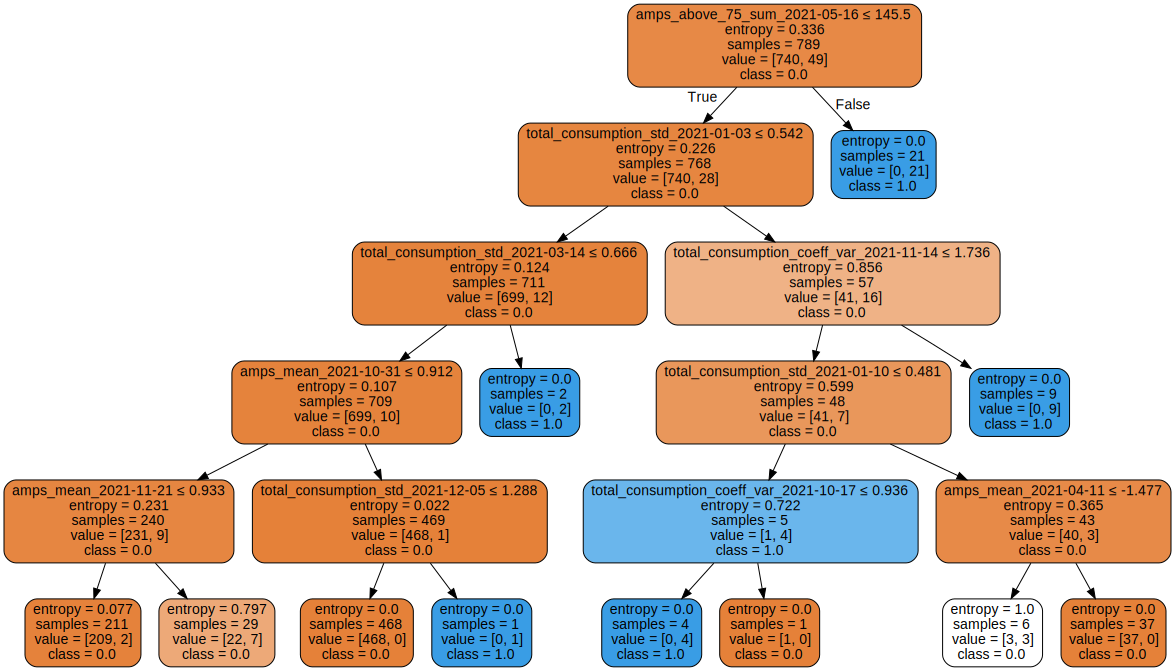

In [329]:

# Draw a tree
import graphviz 

dot_data = tree.export_graphviz(dtree, out_file=None, 
    feature_names=df_analysis.drop('has_ev', axis=1).columns,    
    class_names=df_analysis['has_ev'].unique().astype(str),  
    filled=True, rounded=True,  
    special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [330]:
# Accuracy on Train
print("Training Accuracy is: ", dtree.score(X_train, y_train))

# Accuracy on Train
print("Testing Accuracy is: ", dtree.score(X_test, y_test))

Training Accuracy is:  0.9847908745247148
Testing Accuracy is:  0.9810606060606061


In [331]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

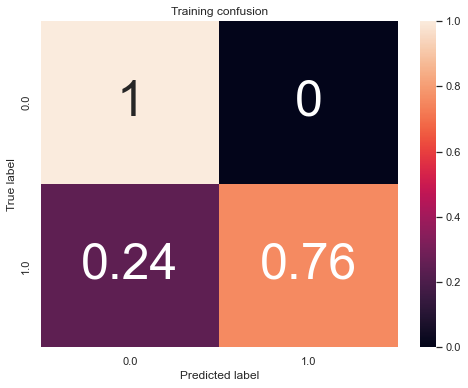

In [332]:
y_pred = dtree.predict(X_train)

# Plotting Confusion Matrix (cm)
cm = confusion_matrix(y_train, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=dtree.classes_, title='Training confusion')
# plot_confusion_matrix(cm, classes=dt.classes_, title='Training confusion')

In [333]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print ("The True Positive rate / Recall per class is: ",TPR)

# Precision or positive predictive value
PPV = TP/(TP+FP)
print ("The Precision per class is: ",PPV)

# False positive rate or False alarm rate
FPR = FP/(FP+TN)
print ("The False Alarm rate per class is: ",FPR)

# False negative rate or Miss Rate
FNR = FN/(TP+FN)
print ("The Miss Rate rate per class is: ",FNR)

# Classification error
CER = (FP+FN)/(TP+FP+FN+TN)
print ("The Classification error of each class is", CER)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print ("The Accuracy of each class is", ACC)
print("")

##Total averages :
print ("The average Recall is: ",TPR.sum()/2)
print ("The average Precision is: ",PPV.sum()/2)
print ("The average False Alarm is: ",FPR.sum()/2)
print ("The average Miss Rate rate is: ",FNR.sum()/2)
print ("The average Classification error is", CER.sum()/2)
print ("The average Accuracy is", ACC.sum()/2)

# Explanations: https://youtu.be/0HDy6n3UD5M

The True Positive rate / Recall per class is:  [1.000000 0.755102]
The Precision per class is:  [0.984043 1.000000]
The False Alarm rate per class is:  [0.244898 0.000000]
The Miss Rate rate per class is:  [0.000000 0.244898]
The Classification error of each class is [0.015209 0.015209]
The Accuracy of each class is [0.984791 0.984791]

The average Recall is:  0.8775510204081632
The average Precision is:  0.9920212765957447
The average False Alarm is:  0.12244897959183673
The average Miss Rate rate is:  0.12244897959183673
The average Classification error is 0.015209125475285171
The average Accuracy is 0.9847908745247148


## Random Forests

In [334]:
y_train.sum()

49.0

Training Accuracy is:  1.0
Testing Accuracy is:  0.9734848484848485


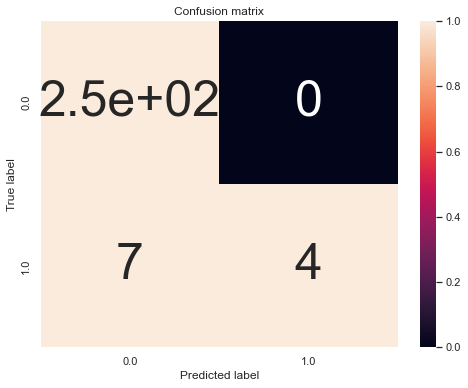

In [339]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=456466)
rf.fit(X_train, y_train)
prediction_test = rf.predict(X=X_test)
prediction_train = rf.predict(X=X_train)

# source: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

# Accuracy on Test
print("Training Accuracy is: ", rf.score(X_train, y_train))
# Accuracy on Train
print("Testing Accuracy is: ", rf.score(X_test, y_test))

# Confusion Matrix
cm = confusion_matrix(y_test, prediction_test)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm, classes=rf.classes_)


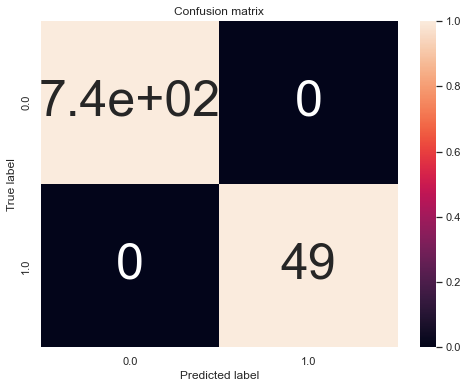

In [336]:
# Confusion Matrix
cm_train = confusion_matrix(y_train, prediction_train)
cm_norm = cm_train/cm_train.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_train, classes=rf.classes_)

In [224]:
# Tunning Random Forest

from itertools import product
n_estimators = 100
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 2, 3, 4, 5]
criterion = ['gini', 'entropy']
for c, f, d in product(criterion, max_features, max_depths): # with product we can iterate through all possible combinations
    rf = RandomForestClassifier(n_estimators=n_estimators, 
                                criterion=c, 
                                max_features=f, 
                                max_depth=d, 
                                n_jobs=2,
                                random_state=245)
    rf.fit(X_train, y_train)
    prediction_test = rf.predict(X=X_test)
    print('Classification accuracy on test set with criterion = {}, max features = {} and max_depth = {}: {:.3f}'.format(c, f, d, accuracy_score(y_test,prediction_test)))

    # For each combination (f,d), you'll see classification accuracy & confusion matrix, choose the best combination 
    # (in our case: having highest true negative, lowest false negative)

Classification accuracy on test set with criterion = gini, max features = 1 and max_depth = None: 0.955
Classification accuracy on test set with criterion = gini, max features = 1 and max_depth = 2: 0.953
Classification accuracy on test set with criterion = gini, max features = 1 and max_depth = 3: 0.953
Classification accuracy on test set with criterion = gini, max features = 1 and max_depth = 4: 0.953
Classification accuracy on test set with criterion = gini, max features = 1 and max_depth = 5: 0.953
Classification accuracy on test set with criterion = gini, max features = sqrt and max_depth = None: 0.964
Classification accuracy on test set with criterion = gini, max features = sqrt and max_depth = 2: 0.960
Classification accuracy on test set with criterion = gini, max features = sqrt and max_depth = 3: 0.962
Classification accuracy on test set with criterion = gini, max features = sqrt and max_depth = 4: 0.960
Classification accuracy on test set with criterion = gini, max features =

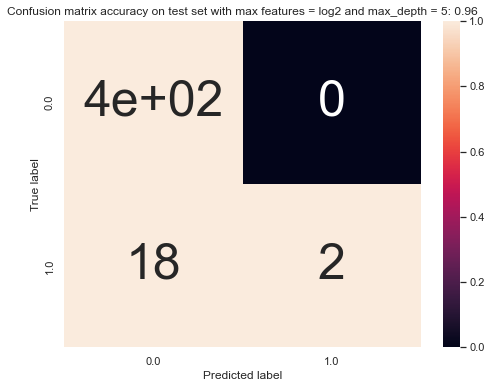

In [225]:
   
    cm = confusion_matrix(y_test, prediction_test)
 #   cm_norm = cm/cm.sum(axis=0)[:, np.newaxis]
    plt.figure()
    plot_confusion_matrix(cm, classes=rf.classes_, title='Confusion matrix accuracy on test set with max features = {} and max_depth = {}: {:.2f}'.format(f, d, accuracy_score(y_test,prediction_test)))


In [226]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost

classifier=xgboost.XGBClassifier(objective='binary:logistic')

params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth":[2,3,4,5,6,8,10,12,15],
    "min_child_weight":[1,3,5,7],
    "gamma":[0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7,1],
    "scale_pos_weight": [4, 15, 16]}

clf=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',cv=5,verbose=3)
# it will run over all combinations and look for the best ROC curve
# source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html


# fitting it
clf.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[00:21:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=1, gamma=0.0, learning_rate=0.3, max_depth=10, min_child_weight=5, scale_pos_weight=4;, score=0.910 total time=   0.3s
[00:21:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=1, gamma=0.0, learning_rate=0.3, max_depth=10, min_child_weight=5, scale_pos_weight=4;, score=0.919 total time=   0.3s
[00:21:25] WARNING: C:

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                      

In [227]:
# best parameters
clf.best_params_

{'scale_pos_weight': 15,
 'min_child_weight': 5,
 'max_depth': 6,
 'learning_rate': 0.25,
 'gamma': 0.3,
 'colsample_bytree': 0.7}

In [228]:
# getting the model with the best parameters
clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, gamma=0.3, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=6,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=20, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=15, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

[00:22:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


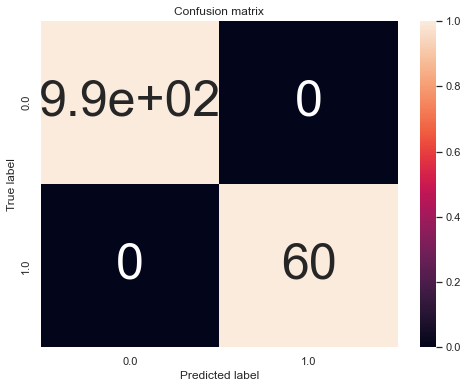

In [230]:
# fiting the model with the best parameters

final_model = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, gamma=0.3, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=6,
              min_child_weight=5, missing=np.nan, monotone_constraints='()',
              n_estimators=100, n_jobs=20, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=15, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

# fitting it
final_model.fit(X,y)

pred_xgboost = final_model.predict(X)

# Confusion Matrix
cm = confusion_matrix(y, pred_xgboost)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm, classes=rf.classes_)

In [219]:
# Accuracy on Test
print("Training Accuracy is: ", clf.score(X_train, y_train))
# Accuracy on Train
print("Testing Accuracy is: ", clf.score(X_test, y_test))

Training Accuracy is:  1.0
Testing Accuracy is:  1.0


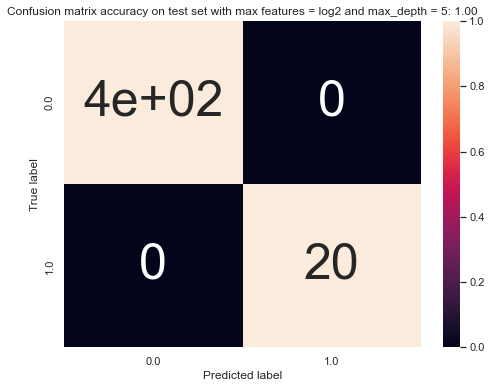

In [233]:
pred_xgboost_test = final_model.predict(X_test)
cm = confusion_matrix(y_test, pred_xgboost_test)
#   cm_norm = cm/cm.sum(axis=0)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm, classes=rf.classes_, title='Confusion matrix accuracy on test set with max features = {} and max_depth = {}: {:.2f}'.format(
    f, d, accuracy_score(y_test, pred_xgboost_test)))
pred_xgboost_test = final_model.predict(X_test)


In [234]:
X1

['d_amps_std_2020-10-04',
 'd_amps_std_2020-10-11',
 'd_amps_std_2020-10-18',
 'd_amps_std_2020-10-25',
 'd_amps_std_2020-11-01',
 'd_amps_std_2020-11-08',
 'd_amps_std_2020-11-15',
 'd_amps_std_2020-11-22',
 'd_amps_std_2020-11-29',
 'd_amps_std_2020-12-06',
 'd_amps_std_2020-12-13',
 'd_amps_std_2020-12-20',
 'd_amps_std_2020-12-27',
 'd_amps_std_2021-01-03',
 'd_amps_std_2021-01-10',
 'd_amps_std_2021-01-17',
 'd_amps_std_2021-01-24',
 'd_amps_std_2021-01-31',
 'd_amps_std_2021-02-07',
 'd_amps_std_2021-02-14',
 'd_amps_std_2021-02-21',
 'd_amps_std_2021-02-28',
 'd_amps_std_2021-03-07',
 'd_amps_std_2021-03-14',
 'd_amps_std_2021-03-21',
 'd_amps_std_2021-03-28',
 'd_amps_std_2021-04-04',
 'd_amps_std_2021-04-11',
 'd_amps_std_2021-04-18',
 'd_amps_std_2021-04-25',
 'd_amps_std_2021-05-02',
 'd_amps_std_2021-05-09',
 'd_amps_std_2021-05-16',
 'd_amps_std_2021-05-23',
 'd_amps_std_2021-05-30',
 'd_amps_std_2021-06-06',
 'd_amps_std_2021-06-13',
 'd_amps_std_2021-06-20',
 'd_amps_std